<a href="https://colab.research.google.com/github/Sadat-Shakeeb/Olympics-Analysis-Web-app/blob/main/Olympics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/athlete_events.csv')
df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


In [4]:
region_df=pd.read_csv('/content/noc_regions.csv')
region_df.head(1)

,NOC,region,notes
0,AFG,Afghanistan,NaN


In [5]:
df.shape

(271116, 15)

In [6]:
df[df['Season']=='Summer']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


In [7]:
df=df.merge(region_df,on='NOC',how='left')

In [8]:
df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [9]:
df.duplicated().sum()

1385

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
med = pd.get_dummies(df['Medal'],dtype=int)

In [13]:
med

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
271111,0,0,0
271112,0,0,0
271113,0,0,0
271114,0,0,0


In [14]:
df = pd.concat((df,med),axis=1)

In [15]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [16]:
df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,Russia,1599,1170,1178
2,Germany,1301,1195,1260
3,UK,677,739,651
4,Italy,575,531,531
...,...,...,...,...
200,Honduras,0,0,0
201,Guyana,0,0,1
202,Guinea-Bissau,0,0,0
203,Guinea,0,0,0


In [17]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [18]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [19]:
medal_tally.head(3)

,region,Gold,Silver,Bronze
0,USA,1131,901,792
1,Russia,727,600,589
2,Germany,580,592,597


In [20]:
medal_tally['total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [21]:
medal_tally.head(5)

,region,Gold,Silver,Bronze,total
0,USA,1131,901,792,2824
1,Russia,727,600,589,1916
2,Germany,580,592,597,1769
3,UK,289,321,312,922
4,France,265,287,334,886


In [22]:
years=df['Year'].unique().tolist()

In [23]:
years.sort()

In [24]:
years.insert(0,'overall')

In [25]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [26]:
country=np.unique(df['region'].dropna().values).tolist()

In [27]:
country.sort()

In [28]:
country.insert(0,'overall')

In [29]:
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [30]:
medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [31]:
#func to fetch medal_tally
def fetch_medal_tally(year, country):
    flag=0
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    if(year == 'Overall' and country == 'Overall'):
        temp_df = medal_df
    if(year == 'Overall' and country != 'Overall'):
        flag=1
        temp_df = medal_df[medal_df['region'].str.lower()== country.lower()]
    if(year != 'Overall' and country == 'Overall'):
        temp_df = medal_df[medal_df['Year']== year]
    if(year != 'Overall' and country != 'Overall'):
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'].str.lower() == country.lower())]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending=True).reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold']+x['Silver']+x['Bronze']

    print(x)

In [32]:
#check validation of fetch_medal_tally func
fetch_medal_tally(year='Overall',country='India')

    Year  Gold  Silver  Bronze  Total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     1       0       0      1
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  1998     0       0       0      0
20  2000     0       0       1      1
21  2002     0       0       0      0
22  2004     0       1       0      1
23  2006     0       0       0      0
24  2008     1       0       2      3
25  2010    

In [33]:
medal_df[medal_df['region'] == 'India']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,0,0,0
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,0,0,0
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,0,0,0
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264077,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0
264138,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,India,NaN,0,0,0
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN,0,0,0
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN,0,0,0


In [34]:
medal_df[(medal_df['Year']==2016) & (medal_df['region']== 'India')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
1185,663,Sharath Kamal Achanta,M,34.0,186.0,85.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,0,0,0
8201,4523,Seema Antil,F,33.0,182.0,92.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Discus Throw,NaN,India,NaN,0,0,0
10177,5562,Aditi Ashok,F,18.0,173.0,57.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Golf,Golf Women's Individual,NaN,India,NaN,0,0,0
10731,5868,Manu Attri,M,23.0,172.0,73.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Doubles,NaN,India,NaN,0,0,0
11772,6427,Lalita Shivaji Babar,F,27.0,166.0,50.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 3,000 metres Steeplechase",NaN,India,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221771,111467,Sathish Kumar Sivalingam,M,24.0,175.0,77.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Men's Middleweight,NaN,India,NaN,0,0,0
238350,119515,Shiva Thapa,M,22.0,169.0,56.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Bantamweight,NaN,India,NaN,0,0,0
241309,120871,Sandeep Tomar,M,25.0,168.0,61.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,India,NaN,0,0,0
264077,132143,Vikas Krishan Yadav,M,24.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,India,NaN,0,0,0


In [35]:
medal_df['Year'] = medal_df['Year'].astype(str)
medal_df['Year'].unique()

<ipython-input-35-ddd3ab41cd67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_df['Year'] = medal_df['Year'].astype(str)


array(['1992', '2012', '1920', '1900', '1988', '1994', '1932', '2002',
       '1952', '1980', '2000', '1996', '1912', '1924', '2014', '1948',
       '1998', '2006', '2008', '2016', '2004', '1960', '1964', '1984',
       '1968', '1972', '1936', '1956', '1928', '1976', '2010', '1906',
       '1904', '1908', '1896'], dtype=object)

#OVERALL ANALYSIS

-no of editions\
-no of cities\
-no of events/sports\
-no of athletes\
-participating nations

In [36]:
def country_year_list(df):
    years = df['Year'].unique().tolist()
    years.sort
    years.insert(0, 'Overall')

    country = np.unique(df['region'].dropna().values).tolist()
    country.sort()

    return years, country

In [39]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [40]:
nations_over_time.rename(columns={'Year' : 'Edition', 'count': "No of countries"},inplace=True)

In [41]:
nations_over_time

,Edition,No of countries
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
29,1912,29
30,1920,29
26,1924,46
27,1928,46
25,1932,47


In [42]:
import plotly.express as px

In [43]:
fig = px.line(nations_over_time, x="Edition", y="No of countries")
fig.show()

In [44]:
x = df.drop_duplicates(['Year','Event','Sport'])

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Year', ylabel='Sport'>

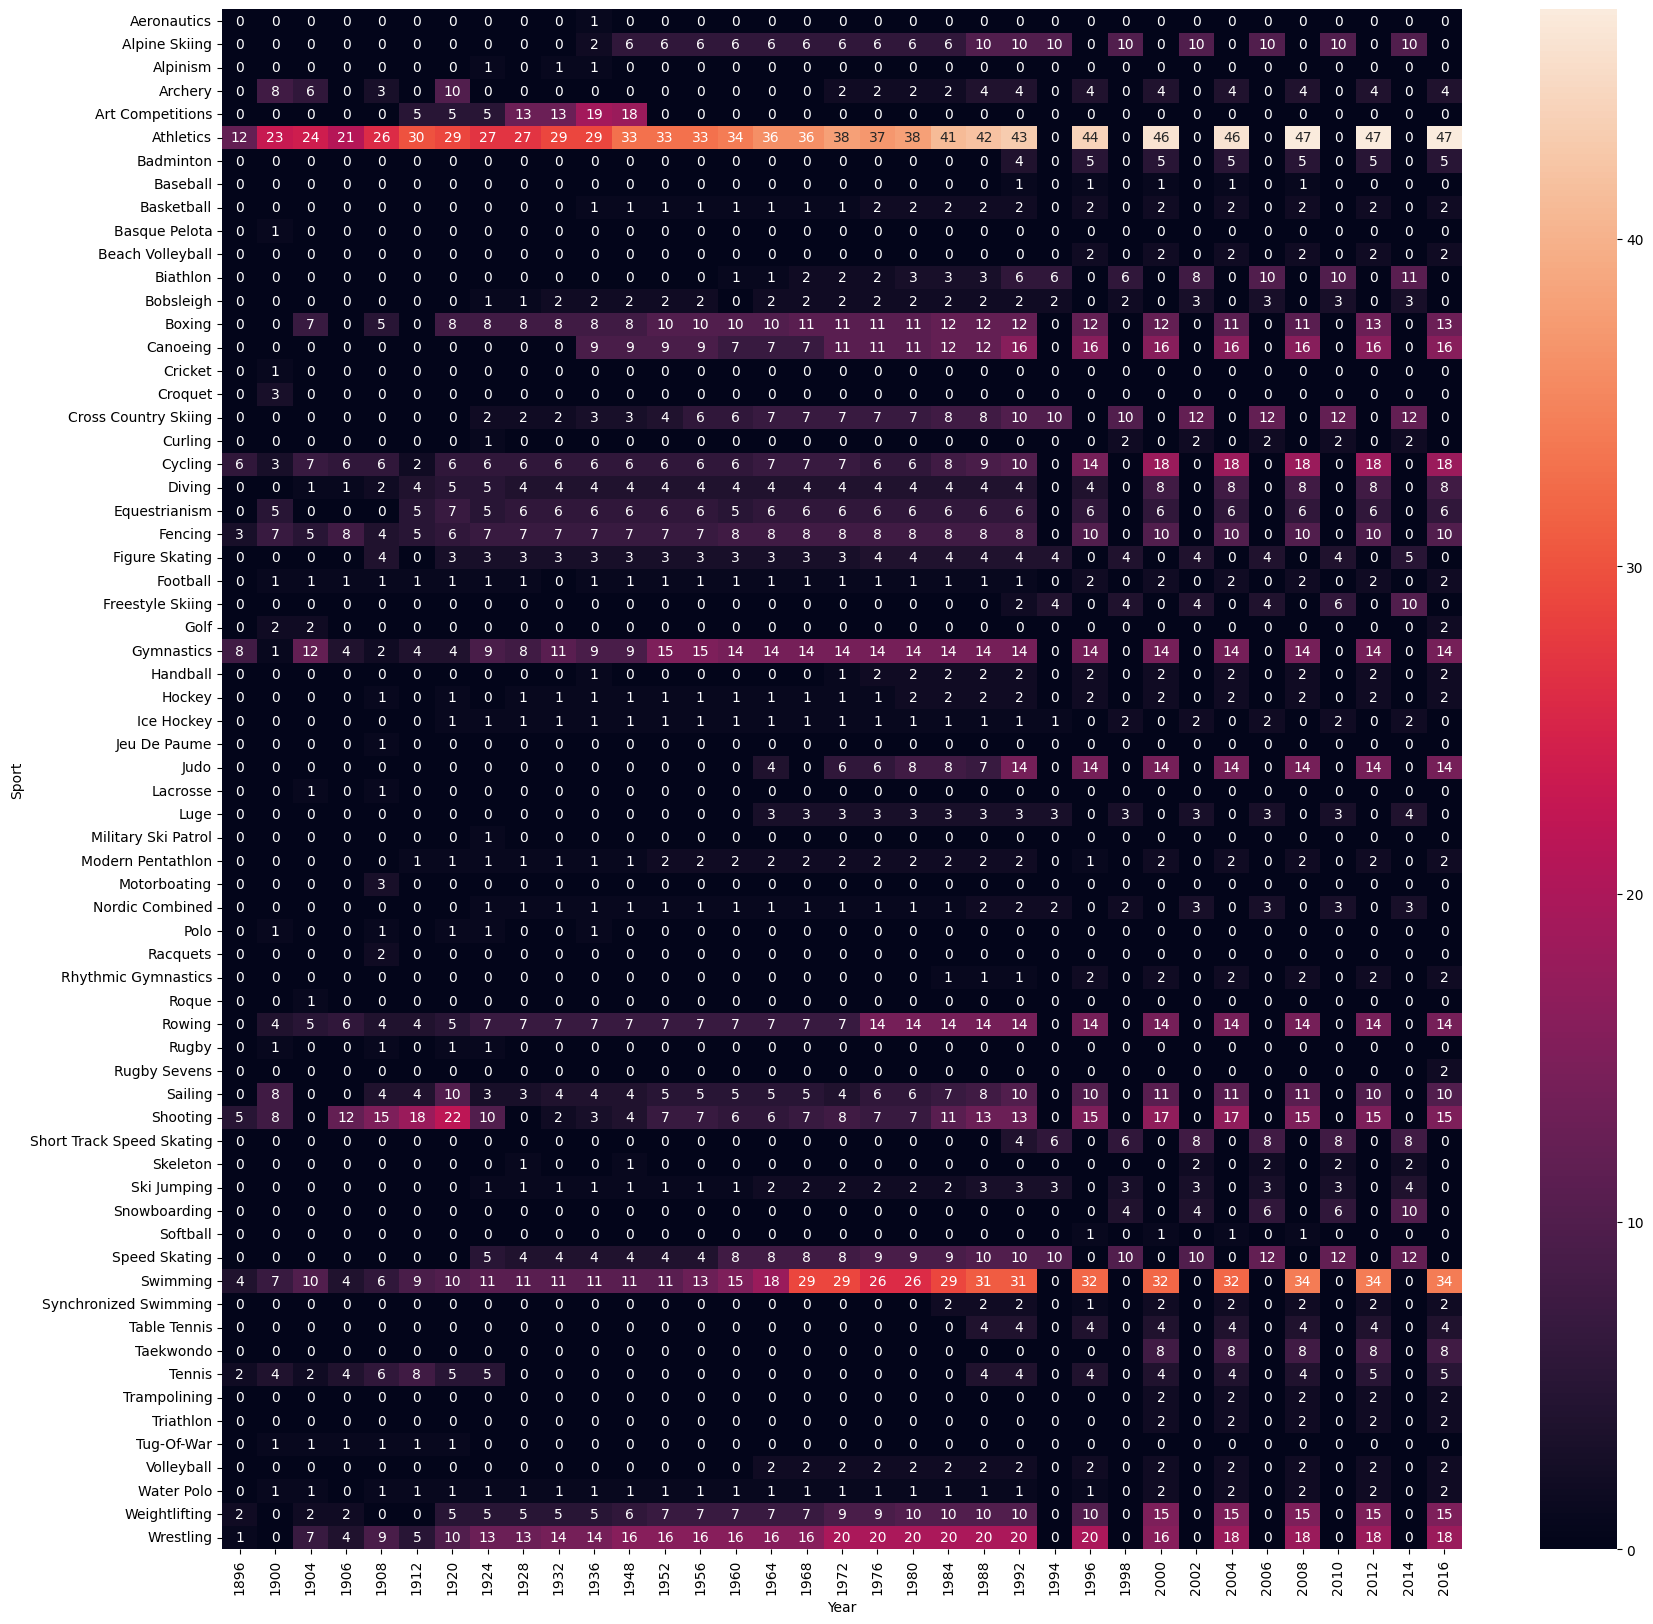

In [48]:
fig,ax = plt.subplots(figsize=(20,20))

sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0),annot=True)

In [49]:
sport = 'Swimming'

temp_df = df.dropna(subset=['Medal'])
if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

In [50]:
print(temp_df['Name'].value_counts().reset_index().head(15))

                                               Name  count
0                           Michael Fred Phelps, II     28
1   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
2              Dara Grace Torres (-Hoffman, -Minas)     12
3                                Ryan Steven Lochte     12
4                     Natalie Anne Coughlin (-Hall)     12
5                    Matthew Nicholas "Matt" Biondi     11
6                                 Mark Andrew Spitz     11
7                              Gary Wayne Hall, Jr.     10
8                             Franziska van Almsick     10
9                         Shirley Frances Babashoff      9
10                                 Ian James Thorpe      9
11                               Leisel Marie Jones      9
12                    Aleksandr Vladimirovich Popov      9
13                         Zoltn Imre dn von Halmay      9
14                  Donald Arthur "Don" Schollander      8


In [63]:
temp_df = df.dropna(subset=['Medal'])

#Country wise

countrywise medal tally per year (line plot)\
what countries are good at heatmap\
most successful athletes (top 10)

In [64]:
temp_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [65]:
new_df = temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [66]:
fig = px.line(final_df, x='Year', y='Medal', title='USA Medal tally over the years')
fig.show()

In [67]:
def most_successful(df, country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country]

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='Name', right_on='Name', how='left')[['Name', 'count', 'Sport']].drop_duplicates('Name')
    x.rename(columns={'count': 'Medals'}, inplace=True)
    return x

In [68]:
most_successful(df, 'India')

,Name,Medals,Sport
0,Udham Singh Kular,4,Hockey
4,Leslie Walter Claudius,4,Hockey
8,Ranganathan Francis,3,Hockey
11,"Balbir Singh Dosanjh, Sr.",3,Hockey
14,Harbinder Singh Chimni,3,Hockey
17,"Victor John ""V. J."" Peter",3,Hockey
20,Randhir Singh Gentle,3,Hockey
23,Dhyan Chand Bais,3,Hockey
26,Balbir Singh,3,Hockey
29,Shankar Pillay Laxman,3,Hockey


In [69]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [70]:
import plotly.figure_factory as ff
import scipy

In [71]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [72]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()